## **Import modules & read dataset**

In [107]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

#Read data
df = pd.read_csv('saas.csv')

## **Data Cleaning**

Handling Outliers

In [108]:
from scipy.stats.mstats import winsorize
# Load your dataset
df = pd.read_csv('saas.csv')

# Apply Winsorizing to the numerical columns
winsorized_data = df.copy()  # Creating a copy to keep the original data unchanged

# List of columns to be winsorized
columns_to_winsorize = ['Sales', 'Quantity', 'Discount', 'Profit']

# Winsorizing each column
for col in columns_to_winsorize:
    winsorized_data[col] = winsorize(winsorized_data[col], limits=[0.05, 0.05])  # 5th and 95th percentiles

# Show the first few rows of the winsorized data and describe to see changes
winsorized_head = winsorized_data.head()
winsorized_description = winsorized_data[columns_to_winsorize].describe()

winsorized_head, winsorized_description

(   Row ID          Order ID  Order Date  Date Key    Contact Name  \
 0       1  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
 1       2  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
 2       3  AMER-2022-138688   6/13/2022  20220613  Deirdre Bailey   
 3       4  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   
 4       5  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   
 
          Country           City Region Subregion           Customer  \
 0        Ireland         Dublin   EMEA      UKIR            Chevron   
 1        Ireland         Dublin   EMEA      UKIR            Chevron   
 2  United States  New York City   AMER     NAMER        Phillips 66   
 3        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
 4        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
 
    Customer ID Industry    Segment                 Product     License  \
 0         1017   Energy        SMB         Marketing Suite  16GRM07R

In [109]:
# Dictionary to store outliers' information
outliers_info = {}

for column in ['Sales', 'Quantity', 'Discount', 'Profit']:
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers = df[outliers_condition]

    # Store information in the dictionary
    outliers_info[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'number_of_outliers': outliers_condition.sum(),  # Count of outliers
        'outliers_indices': outliers.index.tolist()  # Indices of outliers
    }

# 'outliers_info' contains detailed information about the outliers.

# Creating a summary of the information
outliers_summary = {key: {'bounds': (value['lower_bound'], value['upper_bound']), 
                          'number_of_outliers': value['number_of_outliers']} 
                    for key, value in outliers_info.items()}

outliers_summary

{'Sales': {'bounds': (-271.71000000000004, 498.93),
  'number_of_outliers': 1167},
 'Quantity': {'bounds': (-2.5, 9.5), 'number_of_outliers': 170},
 'Discount': {'bounds': (-0.30000000000000004, 0.5),
  'number_of_outliers': 856},
 'Profit': {'bounds': (-39.724125, 70.816875), 'number_of_outliers': 1881}}

In [110]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Define the bounds for the outliers
outlier_bounds = {
    'Sales': (-271.71000000000004, 498.93),
    'Quantity': (-2.5, 9.5),
    'Discount': (-0.30000000000000004, 0.5),
    'Profit': (-39.724125, 70.816875),
}

# 1. Drop outliers for "Quantity"
# This involves filtering the dataframe to exclude rows that fall outside the acceptable range.
df = df[df['Quantity'].between(outlier_bounds['Quantity'][0], outlier_bounds['Quantity'][1])]

# 2. Convert outliers to NaN for "Sales," "Discount," and "Profit"
for col in ['Sales', 'Discount', 'Profit']:
    df[col] = df[col].where(df[col].between(outlier_bounds[col][0], outlier_bounds[col][1]), np.nan)

# 3. Apply MICE for imputation
# The IterativeImputer will perform the MICE procedure. 
# Note: You can adjust the number of iterations and the estimator based on your specific dataset and study requirements.
imputer = IterativeImputer(max_iter=10, random_state=0)

# We need to impute values only for the specific columns, so we'll isolate those first.
cols_to_impute = ['Sales', 'Discount', 'Profit']
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

# The 'df' dataframe now has the outliers removed from "Quantity" and imputed values for "Sales," "Discount," and "Profit."

In [111]:
# Dictionary to store outliers' information
outliers_info = {}

for column in ['Sales', 'Quantity', 'Discount', 'Profit']:
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers = df[outliers_condition]

    # Store information in the dictionary
    outliers_info[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'number_of_outliers': outliers_condition.sum(),  # Count of outliers
        'outliers_indices': outliers.index.tolist()  # Indices of outliers
    }

# 'outliers_info' contains detailed information about the outliers.

# Creating a summary of the information
outliers_summary = {key: {'bounds': (value['lower_bound'], value['upper_bound']), 
                          'number_of_outliers': value['number_of_outliers']} 
                    for key, value in outliers_info.items()}

outliers_summary

{'Sales': {'bounds': (-138.54, 275.06), 'number_of_outliers': 903},
 'Quantity': {'bounds': (-2.5, 9.5), 'number_of_outliers': 0},
 'Discount': {'bounds': (-0.30000000000000004, 0.5), 'number_of_outliers': 0},
 'Profit': {'bounds': (-24.317059176734332, 48.152259379042746),
  'number_of_outliers': 837}}

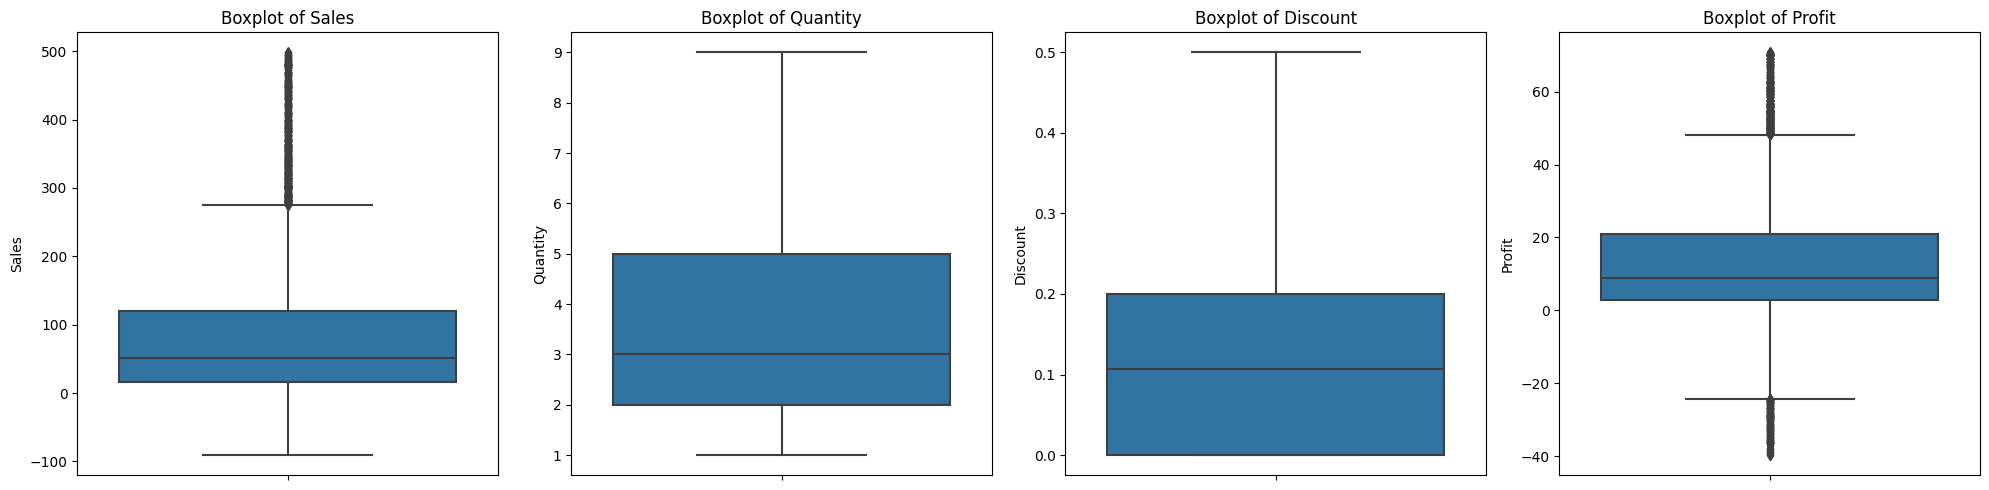

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Selecting specific numeric columns
columns_to_plot = ['Sales', 'Quantity', 'Discount', 'Profit']
numeric_cols = df[columns_to_plot]

# Now, we create boxplots only for these selected columns
plt.figure(figsize=(20, 5))

# Creating plots for the selected numeric columns
for i, column in enumerate(numeric_cols.columns, 1):
    plt.subplot(1, len(numeric_cols.columns), i)
    sns.boxplot(y=numeric_cols[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [113]:
# Dictionary to store outliers' information
outliers_info = {}

for column in ['Sales', 'Quantity', 'Discount', 'Profit']:
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers = df[outliers_condition]

    # Store information in the dictionary
    outliers_info[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'number_of_outliers': outliers_condition.sum(),  # Count of outliers
        'outliers_indices': outliers.index.tolist()  # Indices of outliers
    }

# 'outliers_info' contains detailed information about the outliers.

# Creating a summary of the information
outliers_summary = {key: {'bounds': (value['lower_bound'], value['upper_bound']), 
                          'number_of_outliers': value['number_of_outliers']} 
                    for key, value in outliers_info.items()}

outliers_summary

{'Sales': {'bounds': (-138.54, 275.06), 'number_of_outliers': 903},
 'Quantity': {'bounds': (-2.5, 9.5), 'number_of_outliers': 0},
 'Discount': {'bounds': (-0.30000000000000004, 0.5), 'number_of_outliers': 0},
 'Profit': {'bounds': (-24.317059176734332, 48.152259379042746),
  'number_of_outliers': 837}}

Handling Region Mislabel

In [114]:
import pandas as pd

reference_dict_modified = {
    'EU-WEST': ['Germany', 'France', 'Luxembourg', 'Spain', 'Belgium', 'Netherlands', 'Portugal', 'Austria', 
                'Iceland', 'Switzerland'],  
    'EU-EAST': ['Turkey', 'Poland', 'Czech Republic', 'Russia', 'Ukraine', 'Croatia', 'Slovenia'],
    'EU-NORTH': ['Denmark', 'Finland', 'Norway', 'Sweden'],  
    'EU-SOUTH': ['Italy', 'Greece'],
    'UKIR': ['Ireland', 'United Kingdom'],  
    'NAMER': ['United States', 'Canada'],
    'APAC': ['Japan', 'Australia', 'Philippines', 'India', 'Singapore', 'New Zealand', 
             'South Korea', 'China', 'Indonesia', 'Taiwan'],
    'MEAST': ['Saudi Arabia', 'United Arab Emirates', 'Israel', 'Qatar'],
    'LATAM': ['Costa Rica', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Argentina'],
    'AFRICA': ['South Africa', 'Egypt'],
    'ANZ': ['Australia', 'New Zealand'],
}

# Identify discrepancies with the modified dictionary
modified_anomalies = []

for index, row in df.iterrows():
    correct_subregion = None
    for subregion, countries in reference_dict_modified.items():
        if row['Country'].lower() in [country.lower() for country in countries]:  # case-insensitive comparison
            correct_subregion = subregion
            break
    
    if correct_subregion and row['Subregion'] != correct_subregion:
        modified_anomalies.append((index, row['Country'], row['Subregion'], correct_subregion))

# Function to correct the subregion based on identified anomalies
def correct_subregion(df, anomalies):
    for anomaly in anomalies:
        index, _, _, correct_subregion = anomaly
        df.at[index, 'Subregion'] = correct_subregion
    return df

# Correcting the anomalies in the dataframe
df_final_correction = correct_subregion(df, modified_anomalies)

# Verifying the correction
verification_data_final = df_final_correction.loc[[record[0] for record in modified_anomalies[:20]], ['Country', 'Subregion']]
print(verification_data_final)  # Display the first 10 corrected records for verification

         Country Subregion
12        Sweden  EU-NORTH
14         Japan      APAC
15         Japan      APAC
16         Italy  EU-SOUTH
17        Turkey   EU-EAST
24        Turkey   EU-EAST
34         Japan      APAC
35         Japan      APAC
36         Japan      APAC
37         Japan      APAC
38         Japan      APAC
39         Japan      APAC
40         Japan      APAC
41     Australia      APAC
49         India      APAC
50         India      APAC
51         India      APAC
52         India      APAC
66     Australia      APAC
72  South Africa    AFRICA


In [115]:
def trial(X):
    for i, val in enumerate(reference_dict_modified):
        if X in reference_dict_modified[val]:
            return val

In [116]:
df['Subregion'] = df.Country.apply(lambda x: trial(x))

In [117]:
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.960000,2,0.00,41.913600
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,80.738358,3,0.00,19.337834
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.620000,2,0.00,6.871400
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,137.366879,5,0.45,-5.380514
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.368000,2,0.20,2.516400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248000,3,0.20,4.102800
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960000,2,0.00,15.633200
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576000,2,0.20,19.393200
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600000,4,0.00,13.320000


In [118]:
# Group the dataframe by 'Subregion', and then aggregate the 'Country' column.
countries_by_subregion = df.groupby('Subregion')['Country'].agg(lambda x: ', '.join(set(x)))

# If you want the result to be more structured (like a list instead of a joined string), you can adjust the lambda function:
countries_by_subregion = df.groupby('Subregion')['Country'].agg(lambda x: list(set(x)))

print(countries_by_subregion)

Subregion
AFRICA                                  [Egypt, South Africa]
APAC        [South Korea, Singapore, Japan, India, New Zea...
EU-EAST     [Ukraine, Poland, Slovenia, Croatia, Russia, C...
EU-NORTH                   [Sweden, Norway, Finland, Denmark]
EU-SOUTH                                      [Greece, Italy]
EU-WEST     [Germany, Iceland, Portugal, France, Luxembour...
LATAM       [Costa Rica, Chile, Argentina, Brazil, Mexico,...
MEAST       [Israel, United Arab Emirates, Saudi Arabia, Q...
NAMER                                 [Canada, United States]
UKIR                                [United Kingdom, Ireland]
Name: Country, dtype: object


Handling Future Dates

In [119]:
from datetime import datetime

# Current date
current_date = datetime.now()

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Identify future dates
future_dates = df[df['Order Date'] > current_date]

# Extract relevant information
future_orders = future_dates[['Row ID', 'Order Date']]

future_orders_info = {
    "number_of_future_orders": len(future_orders),
    "future_orders_details": future_orders.values.tolist()
}

future_orders_info

{'number_of_future_orders': 947,
 'future_orders_details': [[76, Timestamp('2023-12-10 00:00:00')],
  [77, Timestamp('2023-12-10 00:00:00')],
  [78, Timestamp('2023-12-10 00:00:00')],
  [85, Timestamp('2023-11-14 00:00:00')],
  [96, Timestamp('2023-11-07 00:00:00')],
  [97, Timestamp('2023-11-10 00:00:00')],
  [107, Timestamp('2023-11-24 00:00:00')],
  [108, Timestamp('2023-11-24 00:00:00')],
  [109, Timestamp('2023-11-24 00:00:00')],
  [111, Timestamp('2023-12-26 00:00:00')],
  [127, Timestamp('2023-11-06 00:00:00')],
  [128, Timestamp('2023-11-06 00:00:00')],
  [145, Timestamp('2023-12-23 00:00:00')],
  [198, Timestamp('2023-11-07 00:00:00')],
  [204, Timestamp('2023-12-18 00:00:00')],
  [206, Timestamp('2023-12-10 00:00:00')],
  [207, Timestamp('2023-12-02 00:00:00')],
  [208, Timestamp('2023-12-02 00:00:00')],
  [209, Timestamp('2023-12-02 00:00:00')],
  [210, Timestamp('2023-12-02 00:00:00')],
  [211, Timestamp('2023-12-02 00:00:00')],
  [237, Timestamp('2023-11-13 00:00:00')],
  

At the date of the data analysis, there are 988 data identified to be future dates. Due to the substantial amount future dates within the dataset, we will assume these dates as future orders or future subscriptions to the SaaS service and analyze separately.

Handling Negative Values in Profit

In [120]:
# Create a new column 'Profit Category' based on the values in 'Profit' column
df['Profit/Loss'] = df['Profit'].apply(lambda x: 'Profit' if x > 0 else 'Loss')

# Display the first few rows to verify
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit/Loss
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.960000,2,0.00,41.913600,Profit
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,80.738358,3,0.00,19.337834,Profit
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.620000,2,0.00,6.871400,Profit
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,137.366879,5,0.45,-5.380514,Loss
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.368000,2,0.20,2.516400,Profit


Handling Negative Values in Sales

In [121]:
import pandas as pd

# Filter rows where "Sales" is less than 0
sales_less_than_0 = df[df['Sales'] < 0]

# Show the filtered data
print(sales_less_than_0)

# Show the count of rows with sales less than 0
print(f"Count of rows with Sales less than 0: {len(sales_less_than_0)}")

      Row ID          Order ID Order Date  Date Key       Contact Name  \
485      486  AMER-2023-140963 2023-06-11  20230611      Alison Fisher   
1463    1464   APJ-2022-152289 2022-08-27  20220827       Karen Mathis   
2280    2281  AMER-2023-142622 2023-10-31  20231031    Kimberly Harris   
2368    2369  AMER-2022-129469 2022-09-24  20220924     Lillian Hodges   
3018    3019   APJ-2022-160528 2022-08-24  20220824     Boris Springer   
3551    3552   APJ-2022-152555 2022-03-30  20220330      Andrea Hughes   
3834    3835  AMER-2020-105984 2020-11-24  20201124      Pippa Edmunds   
3845    3846  AMER-2020-101931 2020-10-28  20201028      Olivia Graham   
4642    4643  EMEA-2023-130141 2023-10-23  20231023     Steven Coleman   
4661    4662  EMEA-2021-112130 2021-05-03  20210503     Alexander Hill   
5774    5775  AMER-2022-142398 2022-04-13  20220413     Gabrielle Dowd   
5918    5919  EMEA-2021-126977 2021-09-17  20210917     Theresa McLean   
6945    6946  EMEA-2022-106243 2022-10

Negative values have been identified after the first iteration of cleaning. After further investigation, it has been determined that there are 20 data that incur a negative values. As it is impossible for sales to be of negative value, we will handle the anomaly by returning it as an absolute value.

In [122]:
import pandas as pd

# Identify negative values in the "Sales" column
negative_values_count = df[df['Sales'] < 0].shape[0]

# Convert negative values to positive and store the changes in the dataframe
df['Sales'] = df['Sales'].abs()

negative_values_count, df.head()  # Display the count and the first few rows of the updated dataframe

# Save the cleaned dataframe to a new CSV file.
df.to_csv('clean_saas.csv', index=False)


In [123]:
# Check if any negative values still exist in the 'Sales' column
current_negative_values = df[df['Sales'] < 0].shape[0]
print(f"Negative values remaining in the 'Sales' column: {current_negative_values}")

Negative values remaining in the 'Sales' column: 0


After careful handling, we can now determine that there are no negative values present in the column sales. Making for a more accurate dataset.

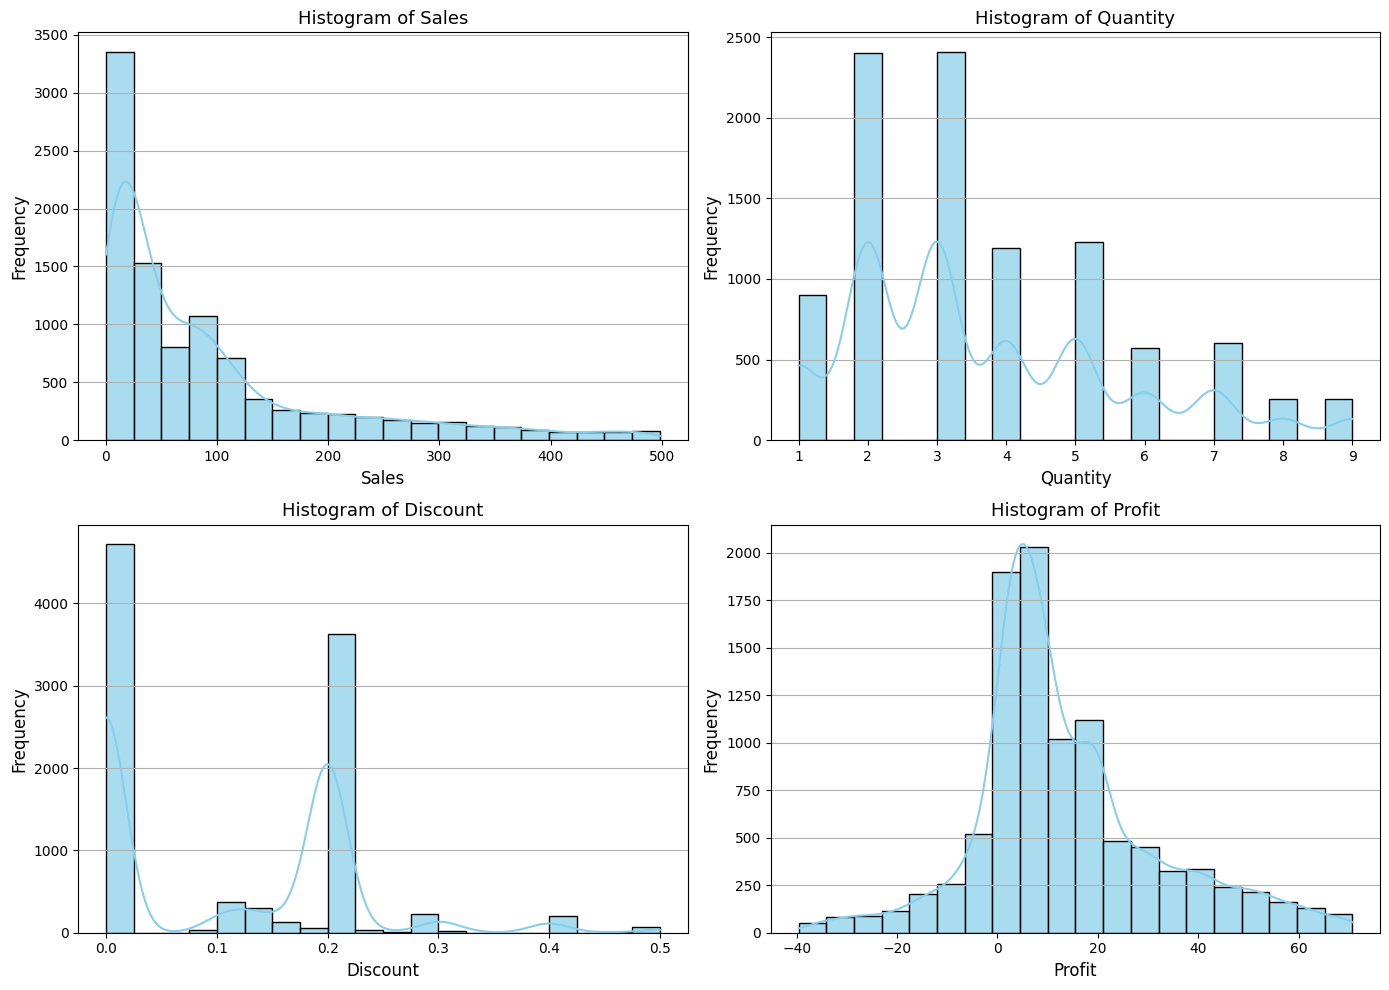

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inline within the Jupyter notebook
%matplotlib inline

# Selecting the data for the histogram
data_to_plot = df[['Sales', 'Quantity', 'Discount', 'Profit']]

# Creating a figure to contain the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of column names to be plotted
columns = ['Sales', 'Quantity', 'Discount', 'Profit']

# Create a histogram with a line (density plot) for each column
for i, column in enumerate(columns):
    sns.histplot(data=data_to_plot, x=column, kde=True, ax=axes[i], bins=20, color='skyblue', alpha=0.7)
    axes[i].set_title(f'Histogram of {column}', fontsize=13)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].grid(axis='y')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

In [125]:
df.describe()

,Row ID,Order Date,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9824.000000,9824,9.824000e+03,9824.000000,9824.000000,9824.000000,9824.000000,9824.000000
mean,4994.756820,2022-05-01 17:17:03.127035648,2.021805e+07,1049.806800,94.349164,3.653909,0.106857,13.468466
min,1.000000,2020-01-04 00:00:00,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-39.637000
25%,2498.750000,2021-05-25 00:00:00,2.021052e+07,1024.000000,16.740000,2.000000,0.000000,2.858935
50%,4994.500000,2022-06-27 00:00:00,2.022063e+07,1049.000000,51.324000,3.000000,0.106491,8.920700
75%,7487.250000,2023-05-15 00:00:00,2.023052e+07,1076.000000,119.960000,5.000000,0.200000,20.976265
max,9994.000000,2023-12-31 00:00:00,2.023123e+07,1101.000000,498.260000,9.000000,0.500000,70.722000
std,2882.115219,NaN,1.122590e+04,29.723887,109.275868,1.978848,0.113098,18.543044


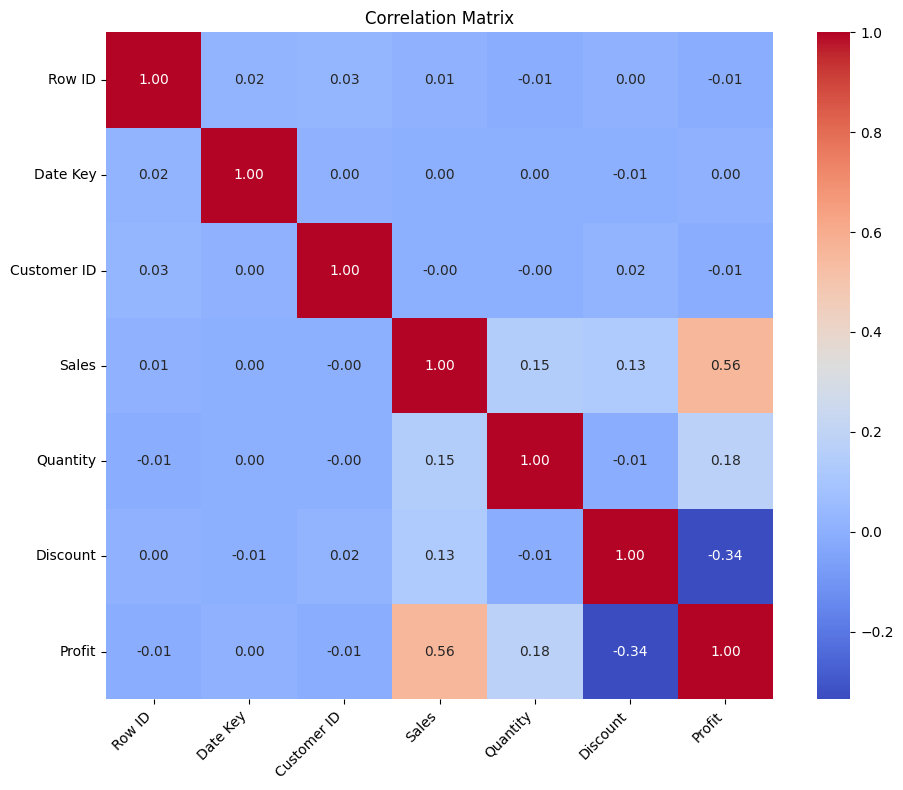

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate correlations
corr = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Size is customizable
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, square=True, fmt=".2f")

# Enhancements for better readability
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [127]:
df.to_csv('clean_saas.csv', index=False)